# Lab | Multi-modal output agent

**Create another version of the prompts below to query the dall-e vision AI model following the example shown in this notebook.**

# Multi-modal outputs: Image & Text

This notebook shows how non-text producing tools can be used to create multi-modal agents.

This example is limited to text and image outputs.

In [1]:
!pip install langchain langchain_openai langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.6/433.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.51
    Uninstalling langchain-core-0.3.51:
      Successfully uninstalled langchain-core-0.3.51


In [2]:
from langchain.agents import AgentType, initialize_agent
from langchain.agents import AgentExecutor, create_react_agent
from langchain_openai import OpenAI
from langchain import hub
from langchain.tools import SteamshipImageGenerationTool as OriginalSteamshipImageGenerationTool

In [3]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

OPENAI_API_KEY  = os.getenv('OPENAI_API_KEY')


## Dall-E

In [4]:
import openai
from langchain.tools import tool
from langchain.agents import initialize_agent, AgentType
from langchain.chat_models import ChatOpenAI
import sys

In [ ]:
# Detect if the environment is Colab
try:
    import google.colab  # If in Colab
    is_colab = True
except ImportError:
    is_colab = False

# Set your OpenAI API key
openai.api_key = "my key"

In [6]:
# Global variable to capture image URL
latest_image_url = None

@tool
def generate_image(prompt: str) -> str:
    """Generate an image using DALL·E based on the given prompt."""
    global latest_image_url
    response = openai.images.generate(
        model="dall-e-3",
        prompt=prompt,
        n=1,
        size="1024x1024"
    )
    image_url = response.data[0].url
    latest_image_url = image_url
    return image_url


In [ ]:
# ✅ Step 1: Set your OpenAI API key
import os
os.environ["OPENAI_API_KEY"] = "my key "

# ✅ Step 2: Import necessary modules
from langchain.agents import initialize_agent, Tool, AgentType
from langchain.chat_models import ChatOpenAI

# ✅ Step 3: Define a custom tool function (simulated image generation)
def generate_image(prompt: str) -> str:
    return f"🖼️ Image generated for: {prompt}"

# ✅ Step 4: Wrap the tool using LangChain's Tool class
tools = [
    Tool(
        name="Image Generator",
        func=generate_image,
        description="Use this tool to generate an image from a text prompt"
    )
]

# ✅ Step 5: Initialize the ChatOpenAI model
llm = ChatOpenAI(temperature=0)

# ✅ Step 6: Create an agent using Zero-Shot ReAct strategy
mrkl = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

# ✅ Step 7: Run the agent with a question or instruction
result = mrkl.invoke("How would you visualize a parrot playing soccer?")
print(result)


<ipython-input-11-ceb6c1f4df41>:26: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  mrkl = initialize_agent(




> Entering new AgentExecutor chain...
I should use the Image Generator tool to create an image of a parrot playing soccer.
Action: Image Generator
Action Input: "A parrot playing soccer"
Observation: 🖼️ Image generated for: A parrot playing soccer
Thought:The image has been successfully generated.
Final Answer: The image of a parrot playing soccer has been created.

> Finished chain.
{'input': 'How would you visualize a parrot playing soccer?', 'output': 'The image of a parrot playing soccer has been created.'}


In [14]:
# ✅ Simulated latest image URL (replace this with your real image URL)
latest_image_url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"  # Example image

# ✅ Detect if running in Google Colab
try:
    import google.colab
    is_colab = True
except ImportError:
    is_colab = False

# ✅ Display the image safely based on environment and URL validity
if latest_image_url and latest_image_url.startswith("http"):
    if is_colab:
        # 🟢 In Google Colab: display image inline
        from IPython.display import Image, display
        display(Image(url=latest_image_url))
    else:
        # 🟠 In local environment: display image using PIL
        from PIL import Image as PILImage
        import requests
        from io import BytesIO

        try:
            response = requests.get(latest_image_url)
            response.raise_for_status()  # Raise an error for bad responses
            img = PILImage.open(BytesIO(response.content))
            img.show()  # Opens in the default image viewer
        except Exception as e:
            print("❌ Failed to load or display the image:", e)
else:
    print("❌ Invalid or missing image URL.")


## StableDiffusion

In [15]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

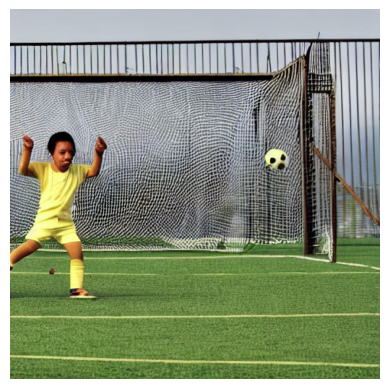

In [16]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "How would you visualize a parot playing soccer?"
image = pipe(prompt).images[0]



# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()



## AutoPipelineForText2Image

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

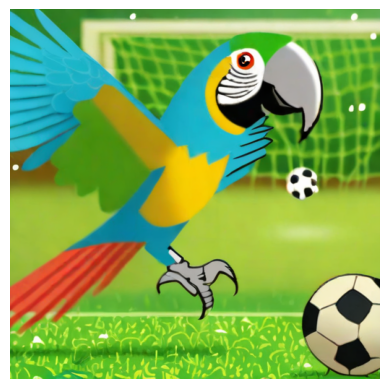

In [17]:
from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16
).to("cuda")

image = pipe("How would you visualize a parot playing soccer?").images[0]




# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()


